<a href="https://colab.research.google.com/github/Hyewon-Git/2021_HUFS_NLP/blob/main/%ED%98%9C%EC%9B%90_NLP_04_03_simple_project_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EVN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

# 단어 긍정(2), 중립(1), 부정(0) 분류 프로젝트

## 데이터

In [ ]:
# 입력 문장
sentences = [
    '나는 오늘 기분이 좋아',
    '나는 오늘 우울해'
]

# 출력 정답
labels = [[1, 1, 1, 2],
          [1, 1, 0]]  # 긍정(2), 중립(1), 부정(0)

# 정답 dic
id_to_label = {0: '부정', 1: '중립', 2: '긍정'}

## Vocabulary

In [ ]:
# 각 문장을 띄어쓰기 단위로 분할
words = []
for sentence in sentences:
    words.extend(sentence.split())
words

['나는', '오늘', '기분이', '좋아', '나는', '오늘', '우울해']

In [ ]:
# 중복 단어 제거
words = list(dict.fromkeys(words))
words

['나는', '오늘', '기분이', '좋아', '우울해']

In [ ]:
# 각 단어별 고유한 번호 부여
word_to_id = {'[PAD]': 0, '[UNK]': 1}
for word in words:
    word_to_id[word] = len(word_to_id)
word_to_id

{'[PAD]': 0, '[UNK]': 1, '기분이': 4, '나는': 2, '오늘': 3, '우울해': 6, '좋아': 5}

In [ ]:
# 각 숫자별 단어 부여
id_to_word = {_id:word for word, _id in word_to_id.items()}
id_to_word

{0: '[PAD]', 1: '[UNK]', 2: '나는', 3: '오늘', 4: '기분이', 5: '좋아', 6: '우울해'}

## 모델 학습용 데이터 생성

In [ ]:
# 학습용 입력 데이터 생성
train_inputs = []
for sentence in sentences:
    train_inputs.append([word_to_id[word] for word in sentence.split()])
train_inputs

[[2, 3, 4, 5], [2, 3, 6]]

In [ ]:
# train label은 labels를 그래도 사용
train_labels = labels
train_labels

[[1, 1, 1, 2], [1, 1, 0]]

In [ ]:
# train inputs을 numpy array로 변환
np.array(train_inputs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


array([list([2, 3, 4, 5]), list([2, 3, 6])], dtype=object)

In [ ]:
# train labels을 numpy array로 변환
np.array(train_labels)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


array([list([1, 1, 1, 2]), list([1, 1, 0])], dtype=object)

In [ ]:
# 문장의 길이를 모두 동일하게 변경 (최대길이 4)
for row in train_inputs:
    row += [0] * (4 - len(row))
train_inputs

[[2, 3, 4, 5], [2, 3, 6, 0]]

In [ ]:
# train inputs을 numpy array로 변환
train_inputs = np.array(train_inputs)
train_inputs

array([[2, 3, 4, 5],
       [2, 3, 6, 0]])

In [ ]:
# 정답 길이를 모두 동일하게 변경 (최대길이 4)
for row in train_labels:
    row += [1] * (4 - len(row))
train_labels

[[1, 1, 1, 2], [1, 1, 0, 1]]

In [ ]:
# 학습용 정답을 numpy array로 변환
train_labels = np.array(train_labels)
train_labels

array([[1, 1, 1, 2],
       [1, 1, 0, 1]])

## 모델링

In [ ]:
# 입력 단어를 vector로 변환
embedding = tf.keras.layers.Embedding(len(word_to_id), 8)
hidden = embedding(train_inputs)
hidden

<tf.Tensor: shape=(2, 4, 8), dtype=float32, numpy=
array([[[-0.02204954,  0.0319641 ,  0.01205399, -0.02714337,
         -0.04795093,  0.02318689,  0.00316421,  0.02946574],
        [ 0.01165426, -0.03243496, -0.04182986, -0.04827477,
         -0.04807649, -0.03641516, -0.00685502,  0.03529597],
        [-0.03390983,  0.02727003, -0.04929489, -0.01413209,
         -0.0088865 , -0.04711909, -0.03588102, -0.02352638],
        [-0.03586696, -0.0059287 ,  0.02542773, -0.04695665,
         -0.00573063, -0.02995664, -0.04832691, -0.01147865]],

       [[-0.02204954,  0.0319641 ,  0.01205399, -0.02714337,
         -0.04795093,  0.02318689,  0.00316421,  0.02946574],
        [ 0.01165426, -0.03243496, -0.04182986, -0.04827477,
         -0.04807649, -0.03641516, -0.00685502,  0.03529597],
        [-0.01168207, -0.00348364, -0.03144586, -0.02669088,
         -0.02157706,  0.0213106 , -0.01289503, -0.0437433 ],
        [ 0.01540473,  0.04673977, -0.03717171,  0.01677645,
          0.01853038, -0.

In [ ]:
# embedding weight
weight = embedding.get_weights()[0]
weight

array([[ 0.01540473,  0.04673977, -0.03717171,  0.01677645,  0.01853038,
        -0.0101089 ,  0.0279194 , -0.03042169],
       [ 0.00396531, -0.04159187, -0.01658133, -0.02670224,  0.01160495,
        -0.01954918,  0.04711502, -0.03986689],
       [-0.02204954,  0.0319641 ,  0.01205399, -0.02714337, -0.04795093,
         0.02318689,  0.00316421,  0.02946574],
       [ 0.01165426, -0.03243496, -0.04182986, -0.04827477, -0.04807649,
        -0.03641516, -0.00685502,  0.03529597],
       [-0.03390983,  0.02727003, -0.04929489, -0.01413209, -0.0088865 ,
        -0.04711909, -0.03588102, -0.02352638],
       [-0.03586696, -0.0059287 ,  0.02542773, -0.04695665, -0.00573063,
        -0.02995664, -0.04832691, -0.01147865],
       [-0.01168207, -0.00348364, -0.03144586, -0.02669088, -0.02157706,
         0.0213106 , -0.01289503, -0.0437433 ]], dtype=float32)

In [ ]:
# numpy를 이용해서 직접 조회 (두 결과값 비교)
weight[train_inputs], hidden

(array([[[-0.02204954,  0.0319641 ,  0.01205399, -0.02714337,
          -0.04795093,  0.02318689,  0.00316421,  0.02946574],
         [ 0.01165426, -0.03243496, -0.04182986, -0.04827477,
          -0.04807649, -0.03641516, -0.00685502,  0.03529597],
         [-0.03390983,  0.02727003, -0.04929489, -0.01413209,
          -0.0088865 , -0.04711909, -0.03588102, -0.02352638],
         [-0.03586696, -0.0059287 ,  0.02542773, -0.04695665,
          -0.00573063, -0.02995664, -0.04832691, -0.01147865]],
 
        [[-0.02204954,  0.0319641 ,  0.01205399, -0.02714337,
          -0.04795093,  0.02318689,  0.00316421,  0.02946574],
         [ 0.01165426, -0.03243496, -0.04182986, -0.04827477,
          -0.04807649, -0.03641516, -0.00685502,  0.03529597],
         [-0.01168207, -0.00348364, -0.03144586, -0.02669088,
          -0.02157706,  0.0213106 , -0.01289503, -0.0437433 ],
         [ 0.01540473,  0.04673977, -0.03717171,  0.01677645,
           0.01853038, -0.0101089 ,  0.0279194 , -0.03042169

In [ ]:
# 단어의 vector를 이용해서 긍정(2), 부정(0), 중립(1) 확률값 예측
linear = tf.keras.layers.Dense(3, activation=tf.nn.softmax)
outputs = linear(hidden)
outputs

<tf.Tensor: shape=(2, 4, 3), dtype=float32, numpy=
array([[[0.3316341 , 0.33513662, 0.33322927],
        [0.3404182 , 0.33304864, 0.32653323],
        [0.3252457 , 0.34603664, 0.3287176 ],
        [0.32853886, 0.3380911 , 0.33336997]],

       [[0.3316341 , 0.33513662, 0.33322927],
        [0.3404182 , 0.33304864, 0.32653323],
        [0.31686088, 0.33731577, 0.34582335],
        [0.3318159 , 0.34384567, 0.32433844]]], dtype=float32)>

In [ ]:
# dense의 wieght, bias
weight, bias = linear.get_weights()
weight, bias

(array([[ 0.26533455, -0.58779037, -0.67306197],
        [ 0.1790117 ,  0.48936957, -0.36784995],
        [-0.10686666, -0.6732937 , -0.47718406],
        [ 0.5039814 , -0.03443497,  0.54704195],
        [-0.39555076, -0.00098342, -0.49922377],
        [-0.5278557 , -0.16621906,  0.60133034],
        [ 0.10520089,  0.18828642, -0.17180371],
        [ 0.52179724, -0.01239276, -0.26071194]], dtype=float32),
 array([0., 0., 0.], dtype=float32))

In [ ]:
# numpy를 이용한 xW + b
logits = np.matmul(hidden, weight) + bias
logits

array([[[ 0.00733924,  0.01784524,  0.01213771],
        [ 0.0333615 ,  0.01147523, -0.00828159],
        [ 0.0063663 ,  0.06833004,  0.01698434],
        [-0.02995473, -0.00129449, -0.01535701]],

       [[ 0.00733924,  0.01784524,  0.01213771],
        [ 0.0333615 ,  0.01147523, -0.00828159],
        [-0.04071026,  0.02184635,  0.04675496],
        [ 0.00995134,  0.04556397, -0.01284135]]], dtype=float32)

In [ ]:
# softmax 계산을 위한 준비 exp(x') / sum(exp(x))
numerator = np.exp(logits)
denominator = np.sum(numerator, axis=2, keepdims=True)
numerator, denominator

(array([[[1.0073662 , 1.0180054 , 1.0122117 ],
         [1.0339242 , 1.0115412 , 0.99175256],
         [1.0063865 , 1.0707185 , 1.0171293 ],
         [0.97048944, 0.9987064 , 0.9847602 ]],
 
        [[1.0073662 , 1.0180054 , 1.0122117 ],
         [1.0339242 , 1.0115412 , 0.99175256],
         [0.9601072 , 1.0220867 , 1.0478652 ],
         [1.010001  , 1.046618  , 0.98724073]]], dtype=float32),
 array([[[3.0375834],
         [3.037218 ],
         [3.0942345],
         [2.9539561]],
 
        [[3.0375834],
         [3.037218 ],
         [3.030059 ],
         [3.0438597]]], dtype=float32))

In [ ]:
# 두 결과값 비교
probs = numerator / denominator
probs, outputs

(array([[[0.33163407, 0.3351366 , 0.33322927],
         [0.34041816, 0.3330486 , 0.3265332 ],
         [0.3252457 , 0.34603664, 0.3287176 ],
         [0.3285389 , 0.33809114, 0.33336997]],
 
        [[0.33163407, 0.3351366 , 0.33322927],
         [0.34041816, 0.3330486 , 0.3265332 ],
         [0.31686088, 0.33731577, 0.34582335],
         [0.33181587, 0.34384567, 0.32433844]]], dtype=float32),
 <tf.Tensor: shape=(2, 4, 3), dtype=float32, numpy=
 array([[[0.3316341 , 0.33513662, 0.33322927],
         [0.3404182 , 0.33304864, 0.32653323],
         [0.3252457 , 0.34603664, 0.3287176 ],
         [0.32853886, 0.3380911 , 0.33336997]],
 
        [[0.3316341 , 0.33513662, 0.33322927],
         [0.3404182 , 0.33304864, 0.32653323],
         [0.31686088, 0.33731577, 0.34582335],
         [0.3318159 , 0.34384567, 0.32433844]]], dtype=float32)>)

In [ ]:
def build_model(n_vocab, d_model, n_seq, n_out):
    """
    동작만 하는 간단한 모델
    :param n_vocab: vocabulary 단어 수
    :param d_model: 단어를 의미하는 벡터의 차원 수
    :param n_seq: 문장길이 (단어 수)
    :param n_out: 예측할 class 개수
    """
    inputs = tf.keras.layers.Input((n_seq,))  # (bs, n_seq)
    # 입력 단어를 vector로 변환
    embedding = tf.keras.layers.Embedding(n_vocab, d_model)
    hidden = embedding(inputs)  # (bs, n_seq, d_model)
    #######################################
    # 여기에 CNN 및 RNN 모델을 추가해 보세요.
    #CNN
    conv_1 = tf.keras.layers.Conv1D(filters=128, kernel_size=3, padding='causal')
    hidden=conv_1(hidden)

    #RNN
    rnn_1 = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(units=128, return_sequences=True))
    hidden = rnn_1(hidden)
    rnn_2 = tf.keras.layers.SimpleRNN(units=256, return_sequences=True)
    hidden= rnn_2(hidden)
    #######################################
    # 단어의 vector를 이용해서 정답 확률값 예측
    linear = tf.keras.layers.Dense(n_out, activation=tf.nn.softmax)
    outputs = linear(hidden)  # (bs, n_seq, n_out)
    # 학습할 모델 선언
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

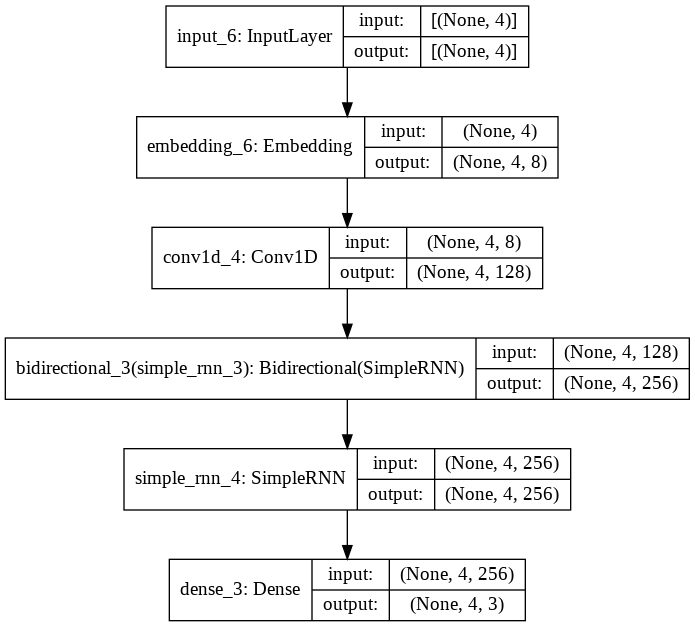

In [ ]:
# 모델 생성
model = build_model(len(word_to_id), 8, 4, 3)
# 모델 내용 그래프 출력
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

## 학습

In [ ]:
# 모델 loss, optimizer, metric 정의
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# 모델 학습
history = model.fit(train_inputs, train_labels, epochs=100, batch_size=16)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 1.0959 - accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 0.9867 - accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 0.8748 - accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 0.7504 - accuracy: 0.7500
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 0.6227 - accuracy: 0.7500
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 0.4999 - accuracy: 0.8750
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 0.3901 - accuracy: 0.8750
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 0.3085 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 0.2315 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 0.1840 - accuracy: 1.0000
Epoch 11/100
1/1 [=====

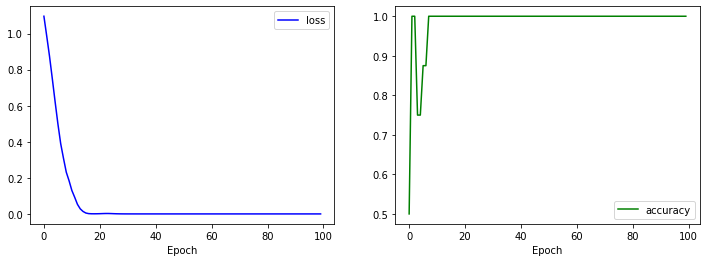

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

## 평가

In [ ]:
# 모델 평가
model.evaluate(train_inputs, train_labels)

1/1 [==============================] - 0s 436ms/step - loss: 2.2799e-06 - accuracy: 1.0000


[2.2798715235694544e-06, 1.0]

## 예측

In [ ]:
# 추론할 입력
string = '나는 기분이 우울해'

In [ ]:
# 입력을 숫자로 변경
infer_input = [word_to_id[word] for word in string.split()]
infer_input

[2, 4, 6]

In [ ]:
# 문장의 길이를 모두 동일하게 변경 (최대길이 4)
infer_input += [0] * (4 - len(infer_input))
infer_input

[2, 4, 6, 0]

In [ ]:
# numpy array 변환 (batch size 1 추가)
infer_inputs = np.array([infer_input])
infer_inputs

array([[2, 4, 6, 0]])

In [ ]:
# 긍정/부정 추론
y_preds = model.predict(infer_inputs)
y_preds

array([[[1.46000075e-05, 9.99979496e-01, 5.93372579e-06],
        [7.17597148e-10, 1.00000000e+00, 4.83437574e-08],
        [9.99912620e-01, 1.65619852e-07, 8.72240635e-05],
        [1.99044267e-10, 1.00000000e+00, 5.54654900e-09]]], dtype=float32)

In [ ]:
# 확률의 max 값을 추론 값으로 결정
y_pred_class = np.argmax(y_preds, axis=2)
y_pred_class

array([[1, 1, 0, 1]])

In [ ]:
# 각 예측 값에 대한 label string
for row in y_pred_class:
    for val in row:
        print(val, ':', id_to_label[val])

1 : 중립
1 : 중립
0 : 부정
1 : 중립


# 문장 긍정(1), 부정(0) 분류 프로젝트

## 데이터

In [ ]:
# 입력 문장
sentences = [
    '나는 오늘 기분이 좋아',
    '나는 오늘 우울해'
]

# 출력 정답
labels = [1, 0]  # 긍정(1), 부정(0)

# 정답 dic
id_to_label = {0: '부정', 1: '긍정'}

## Vocabulary

In [ ]:
# 각 문장을 띄어쓰기 단위로 분할
words = []
for sentence in sentences:
    words.extend(sentence.split())
words

['나는', '오늘', '기분이', '좋아', '나는', '오늘', '우울해']

In [ ]:
# 중복 단어 제거
words = list(dict.fromkeys(words))
words

['나는', '오늘', '기분이', '좋아', '우울해']

In [ ]:
# 각 단어별 고유한 번호 부여
word_to_id = {'[PAD]': 0, '[UNK]': 1}
for word in words:
    word_to_id[word] = len(word_to_id)
word_to_id

{'[PAD]': 0, '[UNK]': 1, '기분이': 4, '나는': 2, '오늘': 3, '우울해': 6, '좋아': 5}

In [ ]:
# 각 숫자별 단어 부여
id_to_word = {_id:word for word, _id in word_to_id.items()}
id_to_word

{0: '[PAD]', 1: '[UNK]', 2: '나는', 3: '오늘', 4: '기분이', 5: '좋아', 6: '우울해'}

## 모델 학습용 데이터 생성

In [ ]:
# 학습용 입력 데이터 생성
train_inputs = []
for sentence in sentences:
    train_inputs.append([word_to_id[word] for word in sentence.split()])
train_inputs

[[2, 3, 4, 5], [2, 3, 6]]

In [ ]:
# train label은 labels를 그래도 사용
train_labels = labels
train_labels

[1, 0]

In [ ]:
# 문장의 길이를 모두 동일하게 변경 (최대길이 4)
for row in train_inputs:
    row += [0] * (4 - len(row))
train_inputs

[[2, 3, 4, 5], [2, 3, 6, 0]]

In [ ]:
# train inputs을 numpy array로 변환
train_inputs = np.array(train_inputs)
train_inputs

array([[2, 3, 4, 5],
       [2, 3, 6, 0]])

In [ ]:
# 학습용 정답을 numpy array로 변환
train_labels = np.array(train_labels)
train_labels

array([1, 0])

## 모델링

In [ ]:
# 입력 단어를 vector로 변환
embedding = tf.keras.layers.Embedding(len(word_to_id), 8)
hidden = embedding(train_inputs)
hidden

<tf.Tensor: shape=(2, 4, 8), dtype=float32, numpy=
array([[[ 0.03703799,  0.04823145, -0.0032931 ,  0.04909035,
         -0.04956923,  0.04516374, -0.00096654, -0.00183177],
        [-0.02327439, -0.02454637,  0.04801836,  0.00659646,
          0.02807531, -0.03792303, -0.00034411,  0.0489539 ],
        [-0.00403597, -0.02227562, -0.0209482 , -0.04139838,
         -0.01960132, -0.0486572 ,  0.02310051, -0.03030114],
        [-0.00955672,  0.02646557,  0.03506689, -0.02213653,
         -0.0169467 , -0.02585856, -0.01777465,  0.03830297]],

       [[ 0.03703799,  0.04823145, -0.0032931 ,  0.04909035,
         -0.04956923,  0.04516374, -0.00096654, -0.00183177],
        [-0.02327439, -0.02454637,  0.04801836,  0.00659646,
          0.02807531, -0.03792303, -0.00034411,  0.0489539 ],
        [-0.00285642, -0.04211094, -0.01686217,  0.04682907,
         -0.04545144,  0.01368506, -0.03244974, -0.04826076],
        [-0.02140534,  0.02699688,  0.04680059,  0.02414066,
         -0.03054467, -0.

In [ ]:
# 각 단어 벡터의 최대값 기준으로 벡터를 더해서 차원을 줄여줌 (문장 vector 생성)
pool = tf.keras.layers.GlobalMaxPool1D()
hidden_pool = pool(hidden)
hidden_pool

<tf.Tensor: shape=(2, 8), dtype=float32, numpy=
array([[ 0.03703799,  0.04823145,  0.04801836,  0.04909035,  0.02807531,
         0.04516374,  0.02310051,  0.0489539 ],
       [ 0.03703799,  0.04823145,  0.04801836,  0.04909035,  0.02807531,
         0.04516374, -0.00034411,  0.0489539 ]], dtype=float32)>

In [ ]:
# 문장 vector를 이용해서 긍정(1), 부정(0) 확률값 예측
linear = tf.keras.layers.Dense(2, activation=tf.nn.softmax)
outputs = linear(hidden_pool)
outputs

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.5475244 , 0.45247564],
       [0.5519521 , 0.44804788]], dtype=float32)>

In [ ]:
def build_model(n_vocab, d_model, n_seq, n_out):
    """
    동작만 하는 간단한 모델
    :param n_vocab: vocabulary 단어 수
    :param d_model: 단어를 의미하는 벡터의 차원 수
    :param n_seq: 문장길이 (단어 수)
    :param n_out: 예측할 class 개수
    """
    inputs = tf.keras.layers.Input((n_seq,))  # (bs, n_seq)
    # 입력 단어를 vector로 변환
    embedding = tf.keras.layers.Embedding(n_vocab, d_model)
    hidden = embedding(inputs)  # (bs, n_seq, d_model)
    #######################################
    # 여기에 CNN 및 RNN 모델을 추가해 보세요.
    #CNN
    conv_1 = tf.keras.layers.Conv1D(filters=128, kernel_size=3, padding='causal')
    hidden=conv_1(hidden)

    #RNN
    rnn_1 = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(units=128, return_sequences=True))
    hidden = rnn_1(hidden)
    rnn_2 = tf.keras.layers.SimpleRNN(units=256, return_sequences=True)
    hidden= rnn_2(hidden)
    #######################################
    # 각 단어 벡터의 최대값 기준으로 벡터를 더해서 차원을 줄여줌 (문장 vector 생성)
    pool = tf.keras.layers.GlobalMaxPool1D()
    hidden_pool = pool(hidden)  # (bs, d_model)
    # 문장 vector를 이용해서 긍정(1), 부정(0) 확률값 예측
    linear = tf.keras.layers.Dense(2, activation=tf.nn.softmax)
    outputs = linear(hidden_pool)  # (bs, n_out)
    # 학습할 모델 선언
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

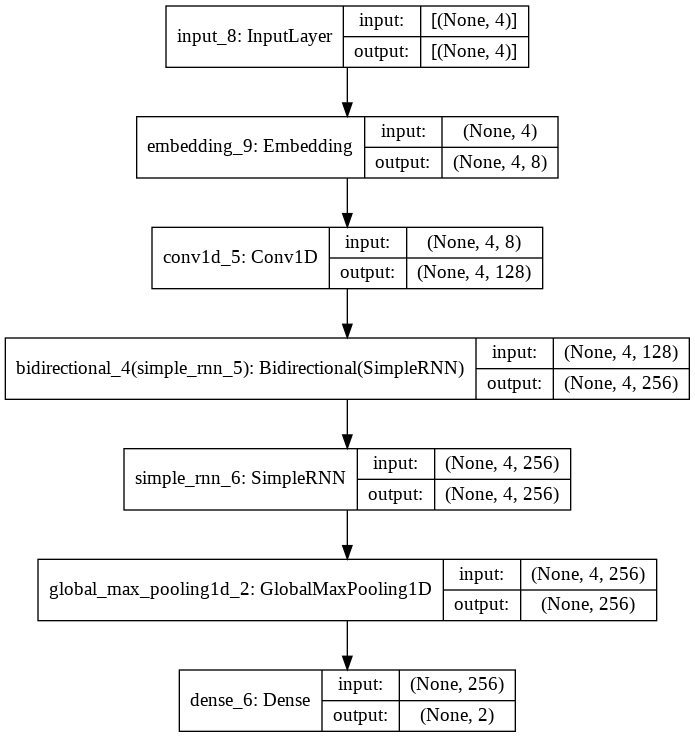

In [ ]:
# 모델 생성
model = build_model(len(word_to_id), 8, 4, 2)
# 모델 내용 그래프 출력
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

## 학습

In [ ]:
# 모델 loss, optimizer, metric 정의
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# 모델 학습
history = model.fit(train_inputs, train_labels, epochs=20, batch_size=16)

Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 0.6916 - accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 8ms/step - loss: 0.6553 - accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 11ms/step - loss: 0.6108 - accuracy: 1.0000
Epoch 4/20
1/1 [==============================] - 0s 11ms/step - loss: 0.5552 - accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 0s 11ms/step - loss: 0.4840 - accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 11ms/step - loss: 0.3934 - accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 0s 13ms/step - loss: 0.2894 - accuracy: 1.0000
Epoch 8/20
1/1 [==============================] - 0s 8ms/step - loss: 0.1860 - accuracy: 1.0000
Epoch 9/20
1/1 [==============================] - 0s 10ms/step - loss: 0.1007 - accuracy: 1.0000
Epoch 10/20
1/1 [==============================] - 0s 11ms/step - loss: 0.0451 - accuracy: 1.0000
Epoch 11/20
1/1 [================

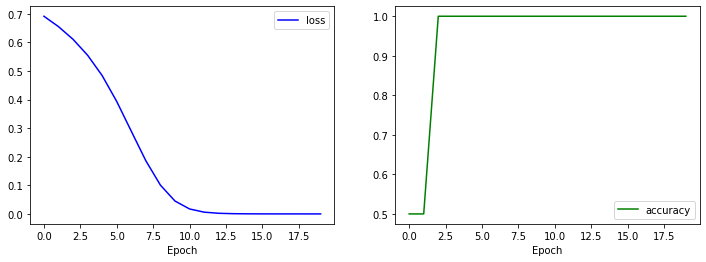

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

## 평가

In [ ]:
# 모델 평가
model.evaluate(train_inputs, train_labels)

1/1 [==============================] - 0s 379ms/step - loss: 1.3709e-05 - accuracy: 1.0000


[1.370897371089086e-05, 1.0]

## 예측

In [ ]:
# 추론할 입력
string = '나는 기분이 우울해'

In [ ]:
# 입력을 숫자로 변경
infer_input = [word_to_id[word] for word in string.split()]
infer_input

[2, 4, 6]

In [ ]:
# 문장의 길이를 모두 동일하게 변경 (최대길이 4)
infer_input += [0] * (4 - len(infer_input))
infer_input

[2, 4, 6, 0]

In [ ]:
# numpy array 변환 (batch size 1 추가)
infer_inputs = np.array([infer_input])
infer_inputs

array([[2, 4, 6, 0]])

In [ ]:
# 긍정/부정 추론
y_preds = model.predict(infer_inputs)
y_preds

array([[9.9997723e-01, 2.2782544e-05]], dtype=float32)

In [ ]:
# 확률의 max 값을 추론 값으로 결정
y_pred_class = np.argmax(y_preds, axis=1)
y_pred_class

array([0])

In [ ]:
# 각 예측 값에 대한 label string
for val in y_pred_class:
    print(val, ':', id_to_label[val])

0 : 부정
